# PyTorch Intro - Dataset description



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader
from IPython.display import clear_output

In [22]:
### Download dataset + apply transform
# https://pytorch.org/vision/stable/datasets.html
min_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
dataset = torchvision.datasets.CIFAR10("../data/",
                                       transform=min_transform,
                                       download=True)

# dataset = torchvision.datasets.FGVCAircraft("../data/",
#                                        download=True)

Files already downloaded and verified


In [23]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

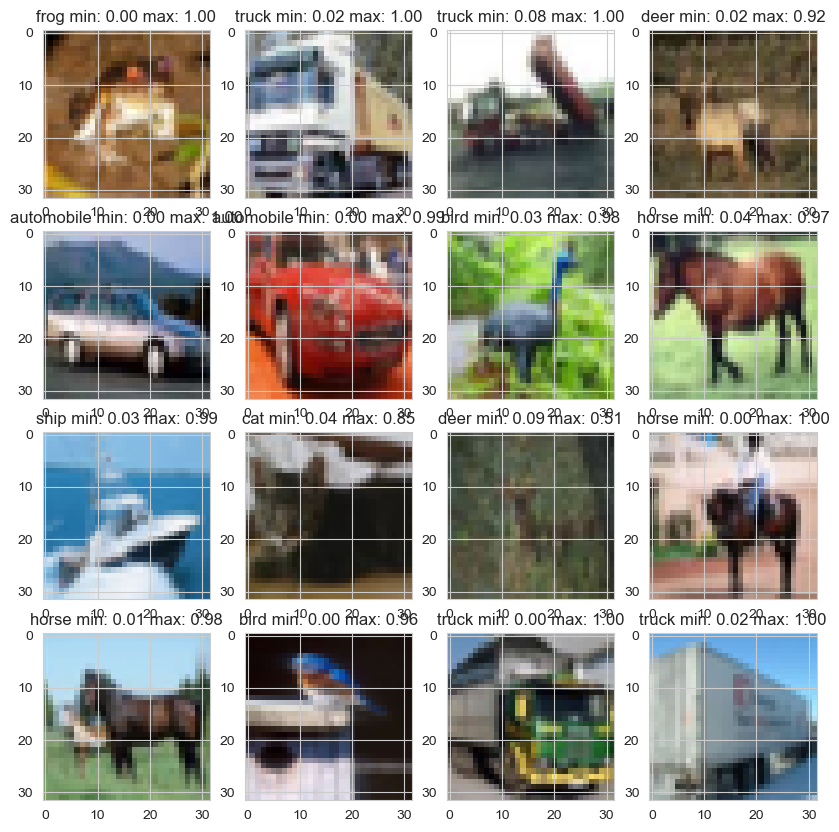

In [24]:
fig, axs = plt.subplots(4, 4,figsize=(10,10))
sample = np.random.randint(0,len(dataset),64)
for i in range(16):
    img, target = dataset.__getitem__(i)
    img = img.permute(1,2,0)
    axs[i//4,i%4].imshow(img)
    axs[i//4,i%4].set_title("{} min: {:.2f} max: {:.2f}".format(dataset.classes[target],torch.min(img),torch.max(img)))

In [25]:
from collections import Counter
Counter(dataset.targets)

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [5]:
dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [6]:
classes = [x[0] for x in sorted(dataset.class_to_idx.items(), key=lambda x: x)]

In [7]:
count_per_classes = [x[1] for x in sorted(Counter(dataset.targets).items(), key=lambda x: int(x[0]))]

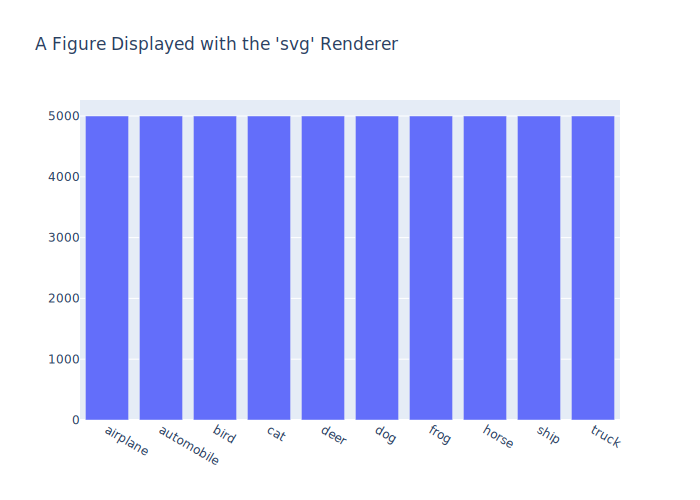

In [8]:
# conda install -c plotly plotly=5.13.1
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(
        x=classes,
        y=count_per_classes)],
    layout_title_text="Dataset class comparison"
)
fig.show(renderer="svg")